In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,NaN,0.2,Iris-setosa


In [3]:
#1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
print("--- Features and their types ---")
print(df.info())
print("\nFeature names are:", df.columns.tolist())


--- Features and their types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  149 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Feature names are: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


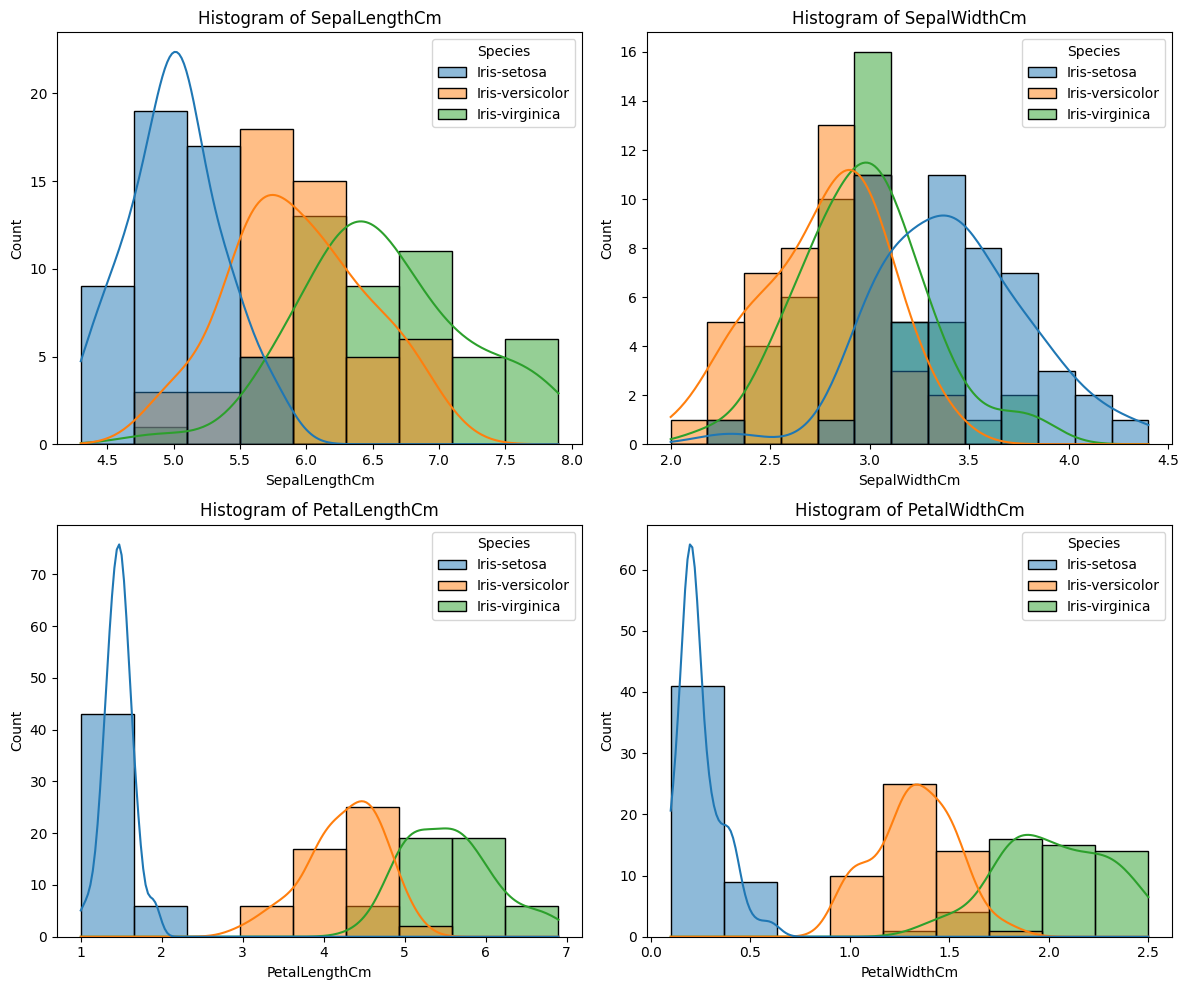

In [6]:
#2. Create a histogram for each feature in the dataset to illustrate the feature distributions.
numeric_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

plt.figure(figsize=(12, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df, x=feature, kde=True, hue='Species')
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()


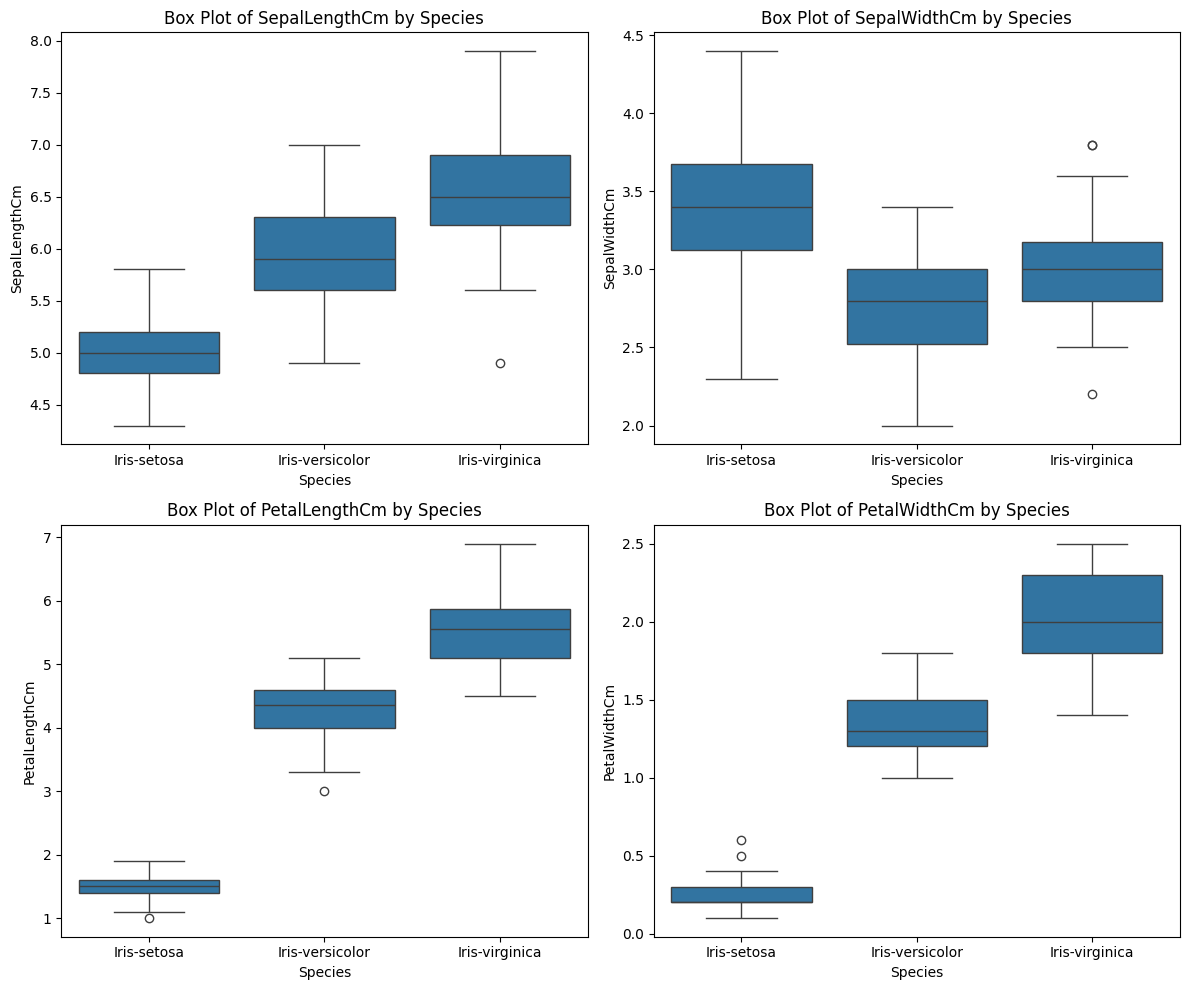

In [8]:
# 3. Create a box plot for each feature in the dataset.
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    # Boxplot grouped by species
    sns.boxplot(data=df, x='Species', y=feature)
    plt.title(f'Box Plot of {feature} by Species')
plt.tight_layout()
plt.show()


In [9]:
# 4. Compare distributions and identify outliers.
# Function to find outliers using the IQR method (used in box plots)
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Find outliers for 'sepal width (cm)'
sepal_width_outliers = find_outliers_iqr(df['SepalWidthCm'])

print("\n--- Outlier Analysis for 'sepal width (cm)' ---")
print(f"Number of potential outliers detected: {len(sepal_width_outliers)}")
if not sepal_width_outliers.empty:
    print("Outlier values:\n", sepal_width_outliers.values)
    print("These correspond to the diamond points in the 'sepal width (cm)' boxplot.")
else:
    print("No outliers detected for this feature using the standard IQR method.")



--- Outlier Analysis for 'sepal width (cm)' ---
Number of potential outliers detected: 4
Outlier values:
 [4.4 4.1 4.2 2. ]
These correspond to the diamond points in the 'sepal width (cm)' boxplot.
